<h1>CS4619: Artificial Intelligence 2</h1>
<h2>Linear Regression</h2>
<h3>
    Derek Bridge<br>
    School of Computer Science and Information Technology<br>
    University College Cork
</h3>

# Initialization $\newcommand{\Set}[1]{\{#1\}}$ $\newcommand{\Tuple}[1]{\langle#1\rangle}$ $\newcommand{\v}[1]{\pmb{#1}}$ $\newcommand{\cv}[1]{\begin{bmatrix}#1\end{bmatrix}}$ $\newcommand{\rv}[1]{[#1]}$

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy.linalg as npla

<h1>Training Set</h1>
<ul>
    <li>The training set contains $m$ examples.</li>
    <li>
        Each example is a pair, comprising a vector of feature values and the value of the dependent variable,
        $$\Tuple{\v{x}, y}$$
    </li>
    <li>
        Here are three examples from a property prices dataset:
        $$\Tuple{\cv{92.9\\3\\2}, 175},\,\, \Tuple{\cv{171.9\\4\\3}, 435},\,\, \Tuple{\cv{79\\3\\1}, 85}$$
        (The prices are in thousands of &euro;)
    </li>
</ul>

<h2>Training Set notation</h2>
<ul>
    <li>
        We need notation that distinguishes one example from another. We will use a superscript.
        <ul>
            <li>
                $\Tuple{\v{x}^{(i)}, y^{(i)}}$ will be the $i$th example
            </li>
            <li>
                The first example in the training set is $\Tuple{\v{x}^{(1)}, y^{(1)}}$, the second is
                $\Tuple{\v{x}^{(2)}, y^{(2)}}$, $\ldots$, the last is $\Tuple{\v{x}^{(m)}, y^{(m)}}$
            </li>
            <li>
                We're writing the superscript in parentheses to make it clear that we are using it for indexing.
                It is not 'raising to a power'. If we want to raise to a power, we will drop the parentheses.
                <ul>
                    <li>
                        So if $y^{(2)} = 9$, what is $y$? (Trick question) And if $y^2 = 9$, what is $y$?
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>
        We can use both superscript and subscripts to select feature values from particular examples.
        <ul>
            <li>
                In the property price dataset shown above, what is $\v{x}_2^{(1)}$?
            </li>
            <li>
                What is $\v{x}_1^{(2)}$?
            </li>
        </ul>
    </li>
</ul>

<h2>Training Set as a matrix</h2>
<ul>
    <li>
        From a training set $\Set{\Tuple{\v{x}^{(1)}, y^{(1)}}, \Tuple{\v{x}^{(2)}, y^{(2)}}, \ldots, 
        \Tuple{\v{x}^{(m)}, y^{(m)}}}$, we can construct a matrix $\v{X}$ and a vector $\v{y}$ as follows:
        $$\v{X} = \begin{bmatrix}
              \v{x}_1^{(1)} & \v{x}_2^{(1)} & \ldots & \v{x}_n^{(1)} \\
              \v{x}_1^{(2)} & \v{x}_2^{(2)} & \ldots & \v{x}_n^{(2)} \\
              \vdots        & \vdots        & \vdots & \vdots \\
              \v{x}_1^{(m)} & \v{x}_2^{(m)} & \ldots & \v{x}_n^{(m)} \\
              \end{bmatrix}\,\,\,\,\,
          \v{y} = \cv{y^{(1)}\\ y^{(2)}\\ \vdots\\ y^{(m)}}
        $$
    </li>
    <li>
        You can think of row $i$ as the transpose of $\v{x}^{(i)}$
    </li>
    <li>
        For the three property price examples given above, we have
        $$\v{X} = 
            \begin{bmatrix}
                92.9 & 3 & 2 \\
                171.9 & 4 & 3 \\
                79 & 3 & 1
            \end{bmatrix}\,\,\,\,\,
          \v{y} = \cv{175\\ 435\\ 85}
        $$
    </li>
</ul>

<h1>Linear Regression using Ordinary Least Squares</h1>
<h2>Hypotheses</h2>
<p>
    We will study how to learn a <em>linear model</em> using <b>linear regression</b>. The algorithm must choose
    from an infinite set of <b>hypotheses</b>, each one a linear function of $\v{x}$. Assuming $n$ features, 
    each hypothesis will have the following form:
    $$h_{\v{\beta}}(\v{x}) = \v{\beta}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots + \v{\beta}_n\v{x}_n$$
</p>
<p>
    $\v{\beta}$ is a vector of <b>parameters</b> &mdash; in effect, the learning algorithm must find the
    parameter values that give a hypothesis that fits the training data well.
</p>
<p>
    Before we see how to do that, let's extend vector $\v{x}$ to make the maths easier.
</p>

<h1>Linear Regression: Modifying the examples</h1>
<ul>
    <li>
        $\v{x}$ was a vector of $n$ elements indexed from 1 to $n$.
    </li>
    <li>
        Now let's make it a vector of $n+1$ elements indexed from 0 to $n$.
    </li>
    <li>
        But we will stipulate that the value of element $\v{x}_0$ is always 1
    </li>
    <li>
        This affects matrix $\v{X}$ that we showed above: it will now have an extra element $\v{x}_0^{(i)}$ in each
        row $i$, all of which will be 1
         $$\v{X} = \begin{bmatrix}
          \v{x}_0^{(1)} = 1 & \v{x}_1^{(1)} & \v{x}_2^{(1)} & \ldots & \v{x}_n^{(1)} \\
          \v{x}_0^{(2)} = 1 & \v{x}_1^{(2)} & \v{x}_2^{(2)} & \ldots & \v{x}_n^{(2)} \\
          \vdots            & \vdots        & \vdots        & \vdots & \vdots \\
          \v{x}_0^{(m)} = 1 & \v{x}_1^{(m)} & \v{x}_2^{(m)} & \ldots & \v{x}_n^{(m)} \\
          \end{bmatrix}
         $$
    </li>
    <li>
         E.g.
         $$
          \mbox{ e.g. }
          \v{X} = 
            \begin{bmatrix}
                1 & 92.9 & 3 & 2 \\
                1 & 171.9 & 4 & 3 \\
                1 & 79 & 3 & 1
            \end{bmatrix}
         $$
    </li>
</ul>

<h2>Linear Regression: Modifying the hypotheses</h2>
<ul>
    <li>
        The inclusion of $\v{x}_0$ changes our hypotheses too.
    </li>
    <li>
        They are now of the form:
        $$h_{\v{\beta}}(\v{x}) = \v{\beta}_0\v{x}_0 + \v{\beta}_1\v{x}_1 + \v{\beta}_2\v{x}_2 + \ldots 
        + \v{\beta}_n\v{x}_n$$
        with $\v{x}_0 = 1$
    </li>
    <li>
        And, as we know, if we are given a set of examples $\v{X}$ and we want to evaluate the hypothesis
        on each example, we can use vectorization:
        $$\v{X}\v{\beta}$$
    </li>
</ul>

<h2>Linear Regression: What must the learner do</h2>
<p>
    The learning algorithm is faced with lots of hypotheses, $h_{\v{\beta}}$, each with a different vector of
    parameters $\v{\beta}$. It wants to find the vector $\v{\beta}$ such that, for each
    example $\v{x}^{(i)}$ in the training set, $h_{\v{\beta}}(\v{x}^{(i)})$ is as close to the <em>actual</em>
    value $y^{(i)}$ as possible. In vector terms, we want vector $\v{X}\v{\beta}$ to be close to vector
    $\v{y}$.
</p>
<p>
    We make this more precise by defining a <b>loss function</b> that can measure 
    how close $h_{\v{\beta}}(\v{x}^{(i)})$ is to $\v{y}^{(i)}$ (or $\v{X}\v{\beta}$ is to $\v{y}$). 
</p>

<h2>The Loss Function for Ordinary Least-Squares Regression</h2>
<ul>
    <li>
        The first linear regression algorithm that we will study is called <b>ordinary least-squares regression</b>
        (OLS). It gets its name from the form of its loss function.
    </li>
    <li>
        In ordinary least-squares regression, the loss function, $J$, is the square of the difference between the
        two values, and this must be summed (or, as here, averaged) over all examples in the training set:
        $$J_{\v{\beta}}(\v{X}, \v{y}) = \frac{1}{2m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{i)}) - \v{y}^{(i)})^2$$
    </li>
    <li>
        Why do we square the differences?
    </li>
    <li>
        Does it make any difference that we halve the total?
    </li>
</ul>
<p>
    So the goal is to find parameters $\v{\beta}$ that minimize $J(\v{\beta})$.
</p>

<h3>The Loss Function in Python</h3>
<p>
    The parameters of this function are beta (the vector of parameter values, represented by a 1d numpy array),
    X (the training set, which is a 2D numpy array), y (the target values, a 1D numpy array). So we can use a
    lot of vectorization:
</p>

In [4]:
def J(beta, X, y):
    """
    Loss function for OLS regression
    """
    h = X.dot(beta)
    differences = h.flatten() - y
    sq_differences = differences ** 2
    return (1.0 / (2 * y.size)) * sq_differences.sum()

<h2>2D Visualization of $J_{\v{\beta}}$</h2>
<p>
    Let's visualize $J_{\v{\beta}}$ using the Cork property dataset as the training set. We'll assume that 
    $\v{\beta}_j = 0$ for all $j$ except $j = 1$. In other words, we are pretending that floor area is the 
    only relevant feature. Then we can plot $J_{\v{\beta}}$ on the vertical axis against different values of
    $\v{\beta}_{1}$ on the horizontal axis.
</p>

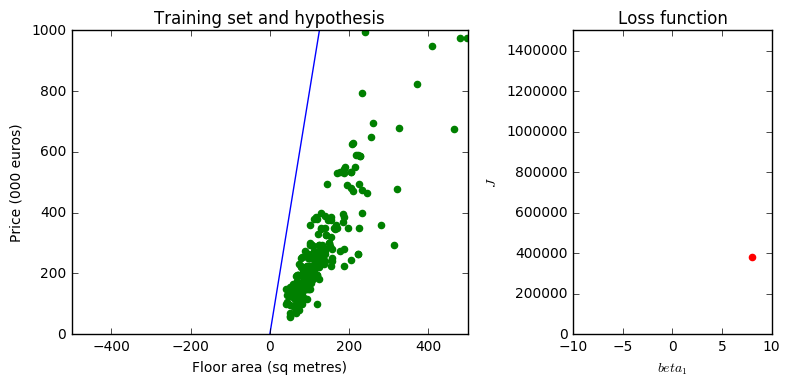

In [5]:
# Use pandas to read the CSV file
df = pd.read_csv("dataset-corkA.csv")

# Get the feature-values and the target values into separate numpy arrays of numbers
X = df[['flarea']].values
y = df['price'].values

# Set up the two subplots
fig = plt.figure(figsize=(8, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
# Lefthand diagram
ax0 = plt.subplot(gs[0])
plt.title("Training set and hypothesis")
plt.xlabel("Floor area (sq metres)")
plt.xlim(-500, 500)
plt.ylabel("Price (000 euros)")
plt.ylim(0, 1000)
# Righthand diagram
ax1 = plt.subplot(gs[1])
plt.title("Loss function")
plt.xlabel("$beta_1$")
plt.xlim(-10, 10)
plt.ylabel("$J$")
plt.ylim(0, 1500000)
fig.tight_layout()

# Hypothesis (which assumes beta_i = 0 for all i except i = 1)
def h(beta1, x):
    return beta1 * x

# Here's the statement you should vary: try different values of beta1
# To see anything on these axes, try beta1 between -10 and +10
beta1 = 8

# Scatter plot of the training set (lefthand diagram)
ax0.scatter(X, y, color = "green")

# Straight line plot of the hypothesis for this value of beta1 (lefthand diagram)
xvals = np.linspace(-500, 500, 3)
ax0.plot(xvals, h(beta1, xvals), color = 'blue')

# Show the value of the loss function for this value of beta1 (righthand diagram)
ax1.scatter(beta1, J(beta1, X, y), color = "red")
plt.show()

<h2>Another 2D Visualization of $J_{\v{\beta}}$</h2>
<p>
    Instead of making manual adjustments, let's use a loop to try several values for $\v{\beta}_1$.
</p>

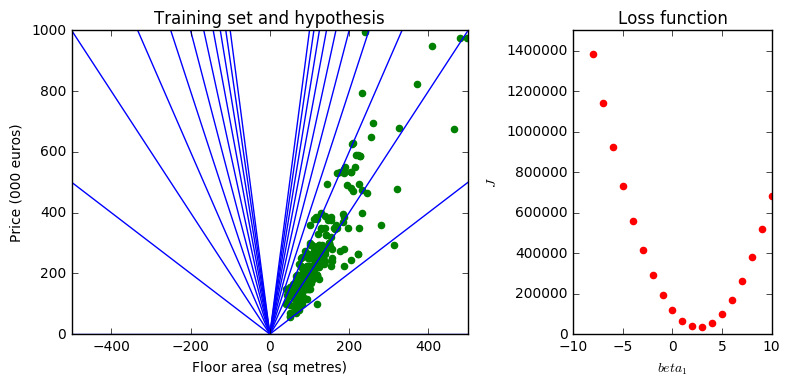

In [6]:
# Set up the two subplots
fig = plt.figure(figsize=(8, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
# Lefthand diagram
ax0 = plt.subplot(gs[0])
plt.title("Training set and hypothesis")
plt.xlabel("Floor area (sq metres)")
plt.xlim(-500, 500)
plt.ylabel("Price (000 euros)")
plt.ylim(0, 1000)
# Righthand diagram
ax1 = plt.subplot(gs[1])
plt.title("Loss function")
plt.xlabel("$beta_1$")
plt.xlim(-10, 10)
plt.ylabel("$J$")
plt.ylim(0, 1500000)
fig.tight_layout()

# Different values of beta1
beta1s = np.linspace(-10, 10, 21)

# Scatter plot of the training set (lefthand diagram)
ax0.scatter(X, y, color = "green")

# Straight line plot of the hypothesis for this value of beta1 (lefthand diagram)
xvals = np.linspace(-500, 500, 3)
for beta1 in beta1s:
    ax0.plot(xvals, h(beta1, xvals), color = 'blue')

# Show the value of the loss function for this value of beta1 (righthand diagram)
ax1.scatter(beta1s, [J(beta1, X, y) for beta1 in beta1s], color = "red")
plt.show()

<p>
    The loss function is <b>convex</b>. Informally, this means:
</p>
<ul>
    <li>
        in 2D, it is u-shaped
    </li>
    <li>
        it has a unique minimum
    </li>
</ul>
<p>
    This is no accident: it follows from the way the loss function has been defined.
</p>

<h2>3D Visualization of $J_{\v{\beta}}$</h2>
<p>
    Let's visualize $J_{\v{\beta}}$ again using the Cork property dataset as the training set. This time, we'll
    assume that $\v{\beta}_j = 0$ for all $j$ except $j = 2$ and $j = 3$. In other words, we are pretending that
    the number of bedrooms and bathrooms are the only relevant features. This will be a 3D plot with 
    $J_{\v{\beta}}$ on the vertical axis against different values of $\v{\beta}_2$ and $\v{\beta}_3$ on the
    horizontal axes.
</p>

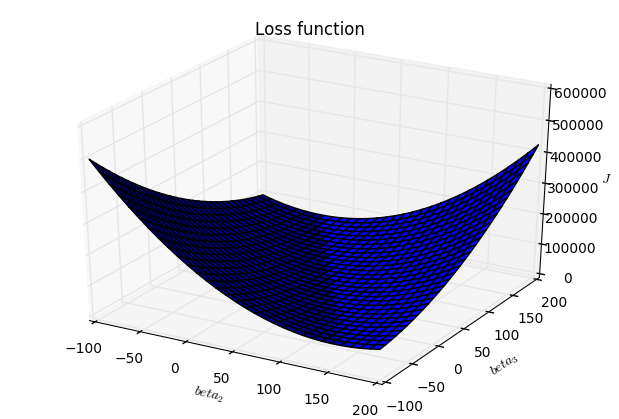

In [7]:
# Get the feature-values and the target values into separate numpy arrays of numbers
X = df[['bdrms', 'bthrms']].values
y = df['price'].values 

fig = plt.figure() 
ax = Axes3D(fig)
ax.set_title("Loss function")
ax.set_xlabel("$beta_2$")
ax.set_ylabel("$beta_3$")
ax.set_zlabel("$J$")
xvals = np.linspace(-100, 200, 301)
yvals = np.linspace(-100, 200, 301)
xxvals, yyvals = np.meshgrid(xvals, yvals)
zs = np.array([J([beta2, beta3], X, y) for beta2, beta3 in zip(xxvals.flatten(), yyvals.flatten())])
zvals = zs.reshape(xxvals.shape)
ax.plot_surface(xxvals, yyvals, zvals)
plt.show()

<h2>Another Visualization of $J_{\v{\beta}}$</h2>
<p>
    Here is the same data on a different kind of plot, called a <b>contour plot</b>. In effect, it flattens 
    the diagram above. The lines connect points that have the same value for $J_{\v{\beta}}$.
</p>

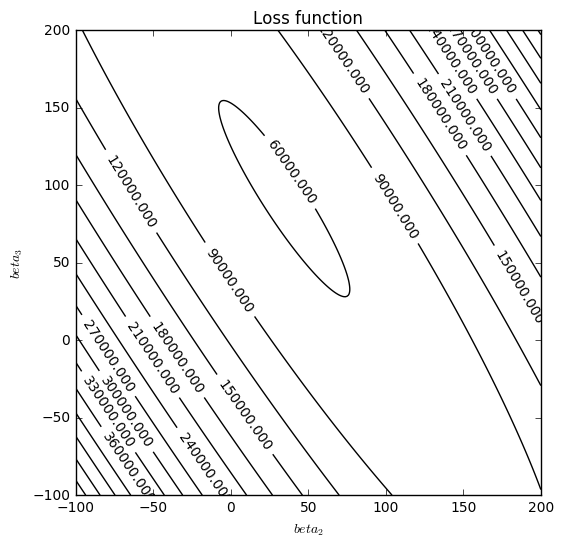

In [8]:
fig = plt.figure(figsize = (6, 6)) 
plt.title("Loss function")
plt.xlabel("$beta_2$")
plt.ylabel("$beta_3$")
xvals = np.linspace(-100, 200, 301)
yvals = np.linspace(-100, 200, 301)
xxvals, yyvals = np.meshgrid(xvals, yvals)
zs = np.array([J([beta2, beta3], X, y) for beta2, beta3 in zip(xxvals.flatten(), yyvals.flatten())])
zvals = zs.reshape(xxvals.shape)
C = plt.contour(xxvals, yyvals, zvals, 15, colors = 'black', linewidth = 0.5)
plt.clabel(C, inline=1, fontsize=10)
plt.show()

<p>
    The 3D visualization and the contour plot show that this too is convex. Informally, this means:
</p>
<ul>
    <li>
        in 3D it is bowl-shaped
    </li>
    <li>
        again there is a unique minimum
    </li>
</ul>

<h2>Gradient of $J_{\v{\beta}}$</h2>
<p>
    We can find the <b>gradient</b> of $J_{\v{\beta}}$ by taking its <b>partial derivatives</b>
    $$\frac{\partial J_{\v{\beta}}(\v{X}, \v{y})}{\partial\v{\beta}_0},
      \frac{\partial J_{\v{\beta}}(\v{X}, \v{y})}{\partial\v{\beta}_1},
      \ldots,
      \frac{\partial J_{\v{\beta}}(\v{X}, \v{y})}{\partial\v{\beta}_n}
    $$
</p>
<p>
    If you do the calculus, you find that
    $$\frac{\partial J_{\v{\beta}}(\v{X}, \v{y})}{\partial\v{\beta}_j} = 
      \frac{1}{m}\sum_{i=1}^m(h_{\v{\beta}}(\v{x}^{(i)}) - \v{y}^{(i)}) \times \v{x}_j^{(i)}$$
</p>

<h2>The Normal Equation</h2>
<p>
    Since $J_{\v{\beta}}$ is convex, we know it has a unique minimum and we can find this point by setting
    the gradient to zero. Then, with some algebraic manipulation, we can come up with what is know as the 
    <b>normal equation</b>, which solves for $\v{\beta}$. In other words, the normal equation gives us the
    parameters that minimize the loss function:
    $$\v{\beta} = (\v{X}^T\v{X})^{-1}\v{X}^T\v{y}$$
</p>

<h2>The Normal Equation in Python</h2>
<p>
    Using numpy.linalg, we can easily write a Python program to solve for $\v{\beta}$.
</p>

In [9]:
# Insert the extra feature (all ones)
df.insert(loc=0, column='ones', value=1)

# Get the feature-values and the target values into separate numpy arrays of numbers
X = df[['ones', 'flarea', 'bdrms', 'bthrms']].values
y = df['price'].values

# Solve the normal equation
beta = npla.inv(X.T.dot(X)).dot(X.T).dot(y)

# Display beta
beta

array([ 62.50261909,   4.6900952 , -72.28169508, -57.05464555])

<p>
    You might notice that these are the same values that we obtained in the introductory lecture.
</p>

<h2>Inverses and Pseudo-inverses</h2>
<p>
    But, as we know, there's a problem. The normal equation requires that $\v{X}^T\v{X}$ has an inverse. 
    And it might not.
</p>
<p>
    When we discussed this in the previous lecture, we mentioned that, in some cases, we can use the 
    pseudo-inverse instead. And this is one of those cases.
    So the more robust way of writing this program is: 
</p>

In [10]:
# Solve the normal equation - but using the pseudo-inverse
beta = npla.pinv(X.T.dot(X)).dot(X.T).dot(y)

# Display beta
beta

array([ 62.50261909,   4.6900952 , -72.28169508, -57.05464555])

<p>
    The simplest algorithms for computing the inverse (or pseudo-inverse) of a $n \times n$ matrix is cubic in 
    $n$ (although there are algorithms that are somewhere between quadratic and cubic). That makes this a feasible
    approach to least-squares regression when the number of features is no more than a few thousand.
</p>
<p>
    We're going to look at another method, gradient descent, and we will compare them afterwards.
</p>